# Plotting the topography of Berwick Law

This Notebook is to summarize all the code used to visualize and analyze the topography of Berwick Law.

In [1]:
# Install colour maps
%pip install cmocean

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all the necessary libraries
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import folium
import cmocean as cmo

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

## 25m DTM data
Plotting the contours and elevation of the *unblended* 25dtm Berwick Law data.

In [3]:
# Reading in the data
elevation = np.loadtxt('NorthBerwickLaw.txt')

Text(0, 0.5, 'Distance from origin in northerly direction [m]')

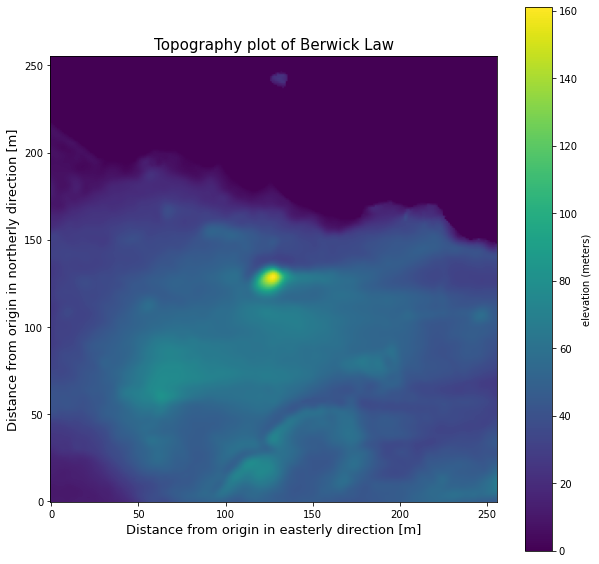

In [4]:
# Need to rotate this first
fig, ax = plt.subplots()
AA=plt.imshow(elevation, origin='lower') #show an image using data from elevation with the origin at lower left corner.

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(AA)
cbar.ax.set_ylabel('elevation (meters)')     #give the colorbar a name.

plt.title("Elevation plot of North Berwick")
plt.title("Topography plot of Berwick Law", fontsize = 15)
plt.xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
plt.ylabel("Distance from origin in northerly direction [m]", fontsize = 13)

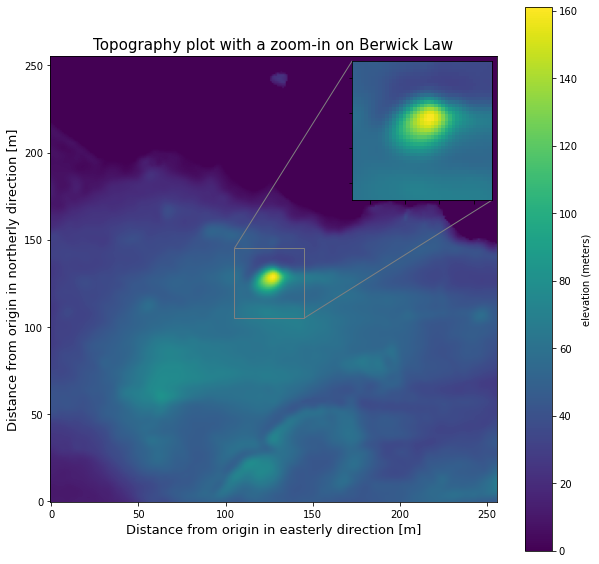

In [17]:
## Make a zoomed in version of the imshow plot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()
AA=plt.imshow(elevation, origin='lower')
cbar = fig.colorbar(AA)
cbar.ax.set_ylabel('elevation (meters)') 
extent = (105, 145, 105, 145)

# Define position of the zoomed-in plot
axins = zoomed_inset_axes(ax, 2, loc=1)
axins.imshow(elevation)
axins.set_xlim(105, 145)
axins.set_ylim(105, 145)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# Set to false, so that x and yticks are not shown
plt.xticks(visible=False)
plt.yticks(visible=False)

# Set the title and axes labels
ax.set_title("Topography plot with a zoom-in on Berwick Law", fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)
plt.draw()

# this plot will be more useful if the resolution of the data is better e.g. for lidar data

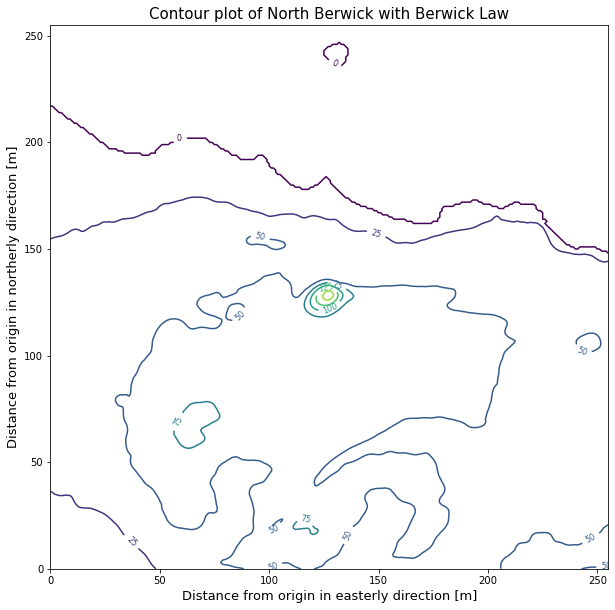

In [6]:
# Contour plot of North Berwick and Berwick Law
fig, ax = plt.subplots()

CS = ax.contour(elevation)   #using elavation as value for contour lines

ax.clabel(CS, inline=1, fontsize=8, fmt='%1.f')
ax.set_title('Contour plot of North Berwick with Berwick Law', fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)
plt.show()

Text(0, 0.5, 'Distance from origin in northerly direction [m]')

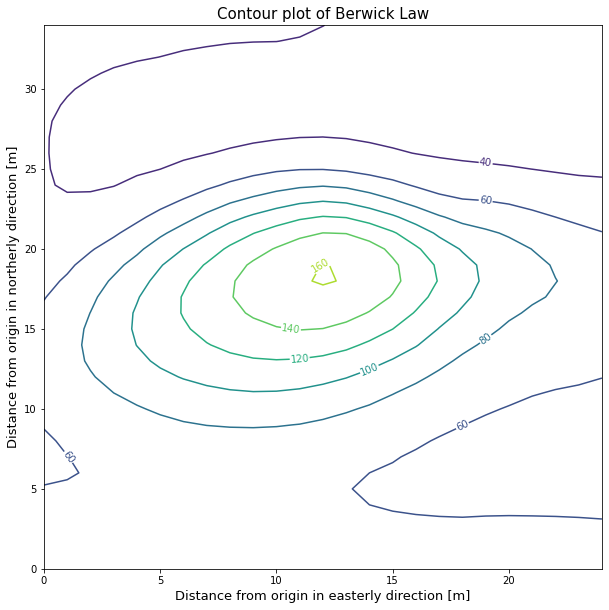

In [7]:
# Contour plot of North Berwick and Berwick Law
# Zoomed in to see more detail
fig, ax = plt.subplots()
CS = ax.contour(elevation[110:145, 115:140])
ax.clabel(CS, inline_spacing = 1, fontsize=10, fmt='%1.f')
ax.set_title("Contour plot of Berwick Law", fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)

### 3D plotting

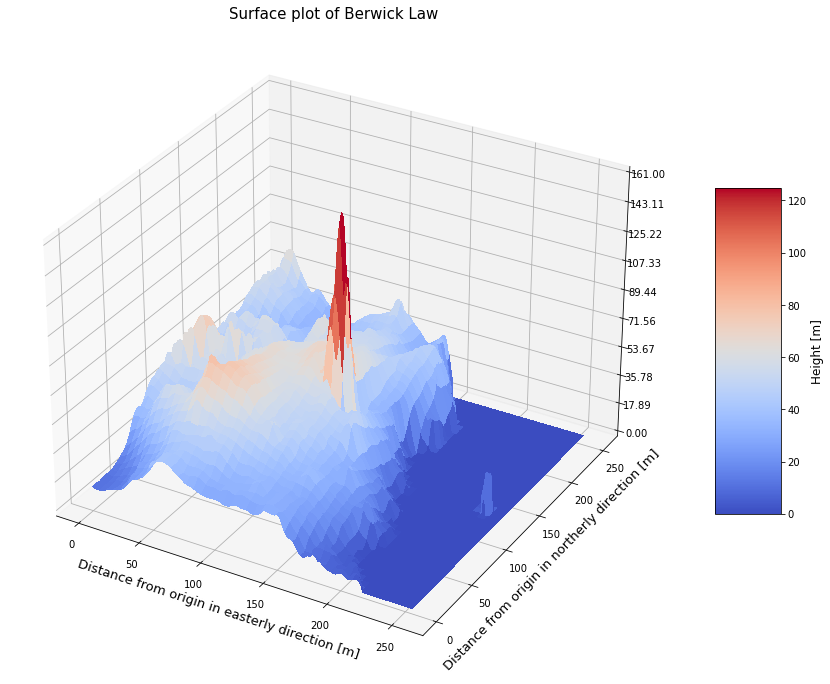

In [8]:
# We will probably not use this plot 

#3d surface
# Define figure and acis
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')

# Define meshgrid and make data
n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface
surf = ax.plot_surface(X, Y, B, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('Surface plot of Berwick Law', fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)


# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.ax.set_ylabel('Height [m]', fontsize = 12)
plt.show()

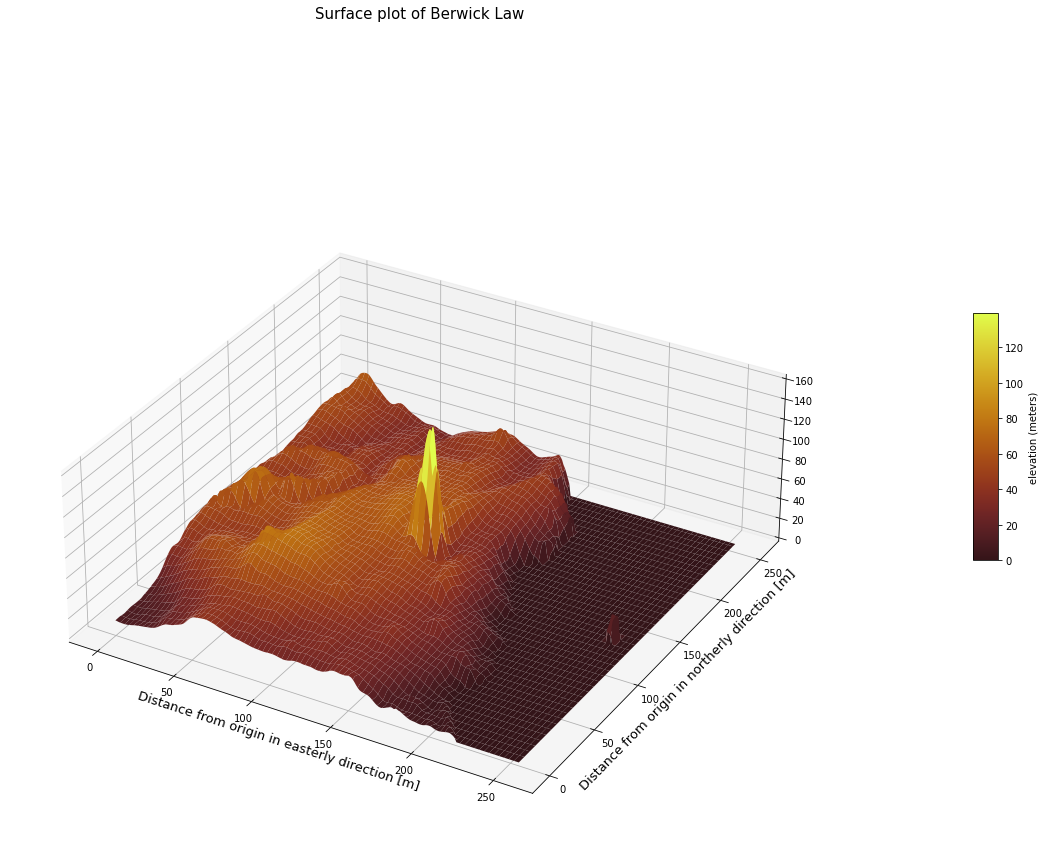

In [9]:
# This plot is more useful 
# Another way of using plot_surface

# Import data
elevation = np.loadtxt('NorthBerwickLaw.txt')
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')


# Scaling of the z-axis to make the plot less spiky and more realistic
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))

# Define meshgrid and make data
n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface
SP2=ax.plot_surface(X, Y, B, cmap= cmo.cm.solar, rcount=50, ccount=100)
#ax.plot_surface(X, Y, B,rcount=50, ccount=100) # without color map
# deep, topo, balance, amp, turbid, solar
# I prefer solar or balance or deep

#Set colour bar
CC=fig.colorbar(SP2, shrink=0.3,aspect=10, pad=0.1)
CC.ax.set_ylabel('elevation (meters)')

# Set axes labels and title
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)
ax.set_title('Surface plot of Berwick Law', fontsize = 15)

fig.tight_layout()

## 2m LIDAR data


In [10]:
# When we have data we can do the same as before

## Fieldwork suggestions
Here's a map with the suggested locations where wind measurements can be made by future groups

In [11]:
# Need to add more locations, measurement 1 is an example

# Create the basemap
loc = [56.0486, -2.7150] # Coordinates of Berwick law
m1 = folium.Map(location=loc, # Map centred at Berwick law
                tiles='OpenStreetMap', 
                zoom_start=17) # Zoomed in to show Berwick law

# Add pop-up showing the coordinates when clicking anywhere on the map
m1.add_child(folium.LatLngPopup())

# Add a marker at measurement 1
tooltip = 'Click me!'
locationName = 'Measurement 1' # Text for pop-up
workloc = [ 56.0480, -2.7166] # Coordinates of Measurement 1
folium.Marker(workloc, popup=locationName).add_to(m1) # Add the marker to basemap
display(m1)

In [12]:
#How many measurements
#How long does it take to take a measurement
'''only have 3 anemometers that can log data (if we get more, could manage 5)
would want measurements at the same time
trade off between how many points and how long you want to measure (1min too short, 1h too long - check JSMB data to see how variable data is and how long you would average to get stable data)
do pilot study to see how many measurements you need
simulate a pilot study with the model, restrict areas where you have data
where you have trees can't take measurements
both cross section and circling at constant elevation could be useful - compromise between access and ideal experiment
always have one on the summit
testing where the model breaks down - would want to test the leeward side of the hill! find the inadequacies of the model
need to think about the atm stability and wind direction
different days the wind would have diff atm stabilities and diff wind speeds and directions
Where is it safe access for risk assessment?
No permission neededfor Berwick law'''
#Do they have to be made at the same time?
#Do we need to think about the wind direction on the day of the measurement
#Trees or other obstructions
#Do we need permission to any areas on the law
#Portable anemometer taken to the measurement location
#measurements through a cross section of the hill - later years can do an animation

"only have 3 anemometers that can log data (if we get more, could manage 5)\nwould want measurements at the same time\ntrade off between how many points and how long you want to measure (1min too short, 1h too long - check JSMB data to see how variable data is and how long you would average to get stable data)\ndo pilot study to see how many measurements you need\nsimulate a pilot study with the model, restrict areas where you have data\nwhere you have trees can't take measurements\nboth cross section and circling at constant elevation could be useful - compromise between access and ideal experiment\nalways have one on the summit\ntesting where the model breaks down - would want to test the leeward side of the hill! find the inadequacies of the model\nneed to think about the atm stability and wind direction\ndifferent days the wind would have diff atm stabilities and diff wind speeds and directions\nWhere is it safe access for risk assessment?\nNo permission neededfor Berwick law"

In [13]:
#Find the wind direction from the horizontal components to make a windrose (Dori) - visualise the impact of the hill in a statistical sense
'''wind climate for blackford and gogarbank data, usually wind roses are for wind speeds and directions at one location in time so you can analyse the dominant wind direction (wind climate)
you can do it for the hill with different locations for one time to see the effect of the hill on a perfectly westerly wind'''
#Ask Richard for model 2 and lidar data
#Find a nice shaped island or hill (Everyone)

'wind climate for blackford and gogarbank data, usually wind roses are for wind speeds and directions at one location in time so you can analyse the dominant wind direction (wind climate)\nyou can do it for the hill with different locations for one time to see the effect of the hill on a perfectly westerly wind'

In [14]:
#Zoomed in section for topoplots (of the law) (Nora)
#potentially add hillshade to the imshow